# What is the True Normal Human Body Temperature? 

<div align="right"> <i>by Chrysa Giannoulaki</i> </div>

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [200]:
import pandas as pd
import numpy as np

import math
import random
import scipy.stats as ss
from scipy.stats import normaltest, ttest_1samp, ttest_ind, norm, kstest
from statsmodels.stats.weightstats import ztest

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import HTML

plt.rcParams["figure.figsize"] = (12, 8)

In [199]:
%matplotlib inline

In [3]:
df = pd.read_csv('./data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1.Is the distribution of body temperatures normal?

Lets look at the basic Measures of Central Tendency and dispersion

In [4]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

#### Investigate if the body temperatures are normal distibuted

In [5]:
temp_sort = df.temperature.sort_values()

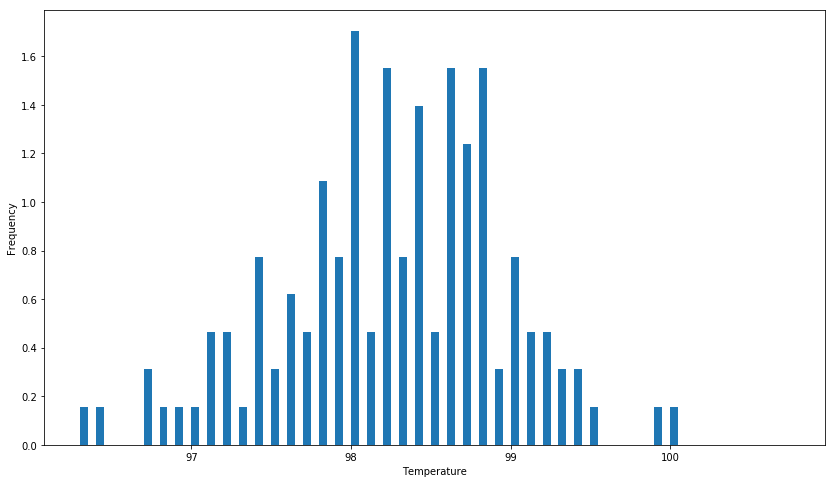

In [124]:
bin_values = np.arange(start=temp_sort.min(), stop=temp_sort.max(), step=.05)
plt.hist(temp_sort, bins = bin_values, normed = True)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()


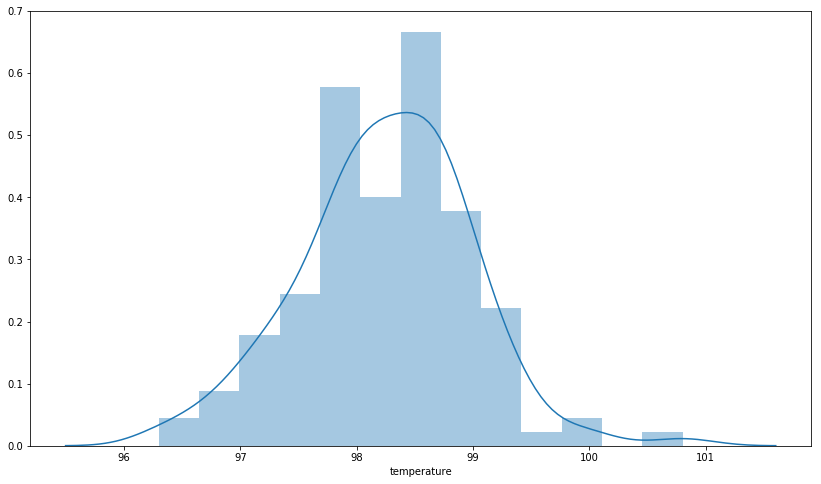

In [125]:
plt.show(sns.distplot(df['temperature']))

Checking if our samples differs from a normal distribution.  This will be our Null Hypothesys ($H_0$)

In [14]:
statistic, p_val = normaltest(df.temperature)

print('p value =', p_val)

p value = 0.258747986349


In [24]:
if p_val < 0.05:
    display(HTML('$H_0$ can be rejected, i.e. our sample does not come from a normal distribution'))
else:
    display(HTML('Our Hypothesis $H_0$ cannot be rejected, i.e. our sample does come from a normal distribution'))

#### Method to investigate if the body temperatures distibution is normal: Quantile Plots

Another method to investigate graphically if the sampled data come from a normal distribution is via a Quantile Plot

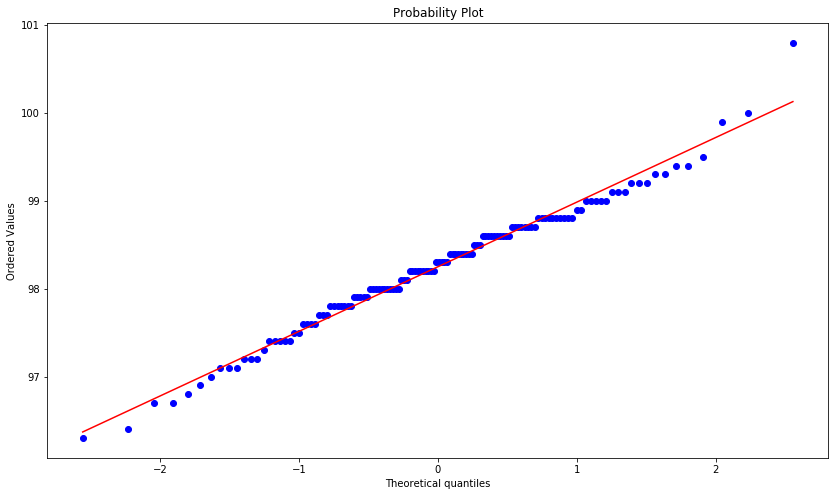

In [129]:
#Quantile Plots CDF
qp = ss.probplot(df.temperature, plot=plt)
plt.show()

We see in the Normal Q-Q plot above that the points in the sample are lined up along the red line, which indecates that it is from a normal distribution. In general, when you see the points arranged on a curve, and points far away from the line on the Q-Q plot, it indicates a tendency towards non-normality. 

### 2.Is the sample size large? Are the observations independent?

In [36]:
HTML('<b>Is the sample size large enough? </b><br> Are the <b>' + str(len(df)) + ' people </b>an adequate sample size?')

In order to answer this we will need to know the underlying size of the population from which they were drawn.

We will need to define our confidence level to 90% ± 5% confidence, i.e. 90% confidence rate ± 5% as a margin of error.

Our necessary Sample Size is calculated by $ Z_{score}^2 * StdDev*(1-StdDev)\ /\ (margin\_of\_error)^2 $ we are assuming that the underlying population is large. For refference look at <b>[this](http://courses.wcupa.edu/rbove/Berenson/10th%20ed%20CD-ROM%20topics/section8_7.pdf)</b>

In [131]:
def sample_size_required(sample_data, confidence, margin_of_error):
        
    zscore = ss.norm.ppf(confidence)
    stdev = np.std(sample_data)
    
    return int((zscore**2) * (stdev) * (1-stdev) / (margin_of_error**2))

In [132]:
HTML('The necessary sample size is: ' + str(sample_size_required(df.temperature, 0.90, 0.05)) + \
     '<br> for confidence level of 90% $\pm$ 5%' )

<b>Lets check if our observations are independent</b>

We are going to regress the the Temperature versus the heart rate to check for the independence.

In [133]:
# To normalize our data series
def norm(series):
    return (series - np.mean(series)) / (np.max(series) - np.min(series))

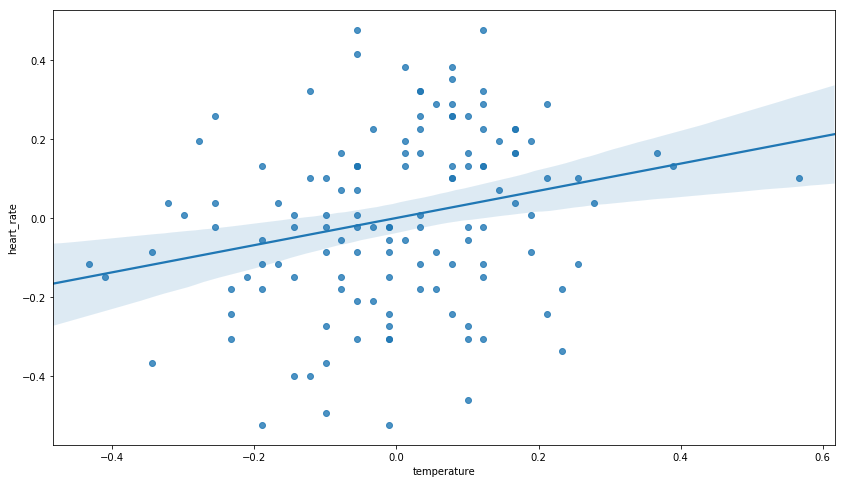

In [134]:
sns.regplot(norm(df.temperature), norm(df.heart_rate));

The data points do not seem to follow a strong trend so we can conclude that high hart rates do not imply high or low temperature, so our observations are independent

### 3.Is the true population mean really 98.6 degrees F?

* Firstly we will try a bootstrap to test the hypothesis. <br>
* Then we will use the frequentist statistical approach. The question is if we should use a one-sample or two-sample test and why.<br>
* We will also elaborate if in this situation is it appropriate to use the t-test  or  z  statistic? <br>
* Finally we will check for the other statistc also and see if the results are diffent and why.

Our hypothesis is the following <br>
$ H_0 $: True mean population temperature = 98.6 $^{\circ}$F  <br>
$ H_1 $: True mean population temperature $\ne$ 98.6 $^{\circ}$F

<b>Bootstrap</b>

In [147]:

def bootstrap(data, func, size=1, seed=123):
    """Draw bootstrap replicates."""
    
    random.seed(seed)

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

In [148]:
bs = bootstrap(df.temperature, np.mean, size=10000)

In [149]:
# Compute and print SEM (standart Error of Mean)
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print(sem)
print(np.mean(df.temperature))

0.0640566146952
98.24923076923078


In [138]:
bs_std = np.std(bs)
print(bs_std)

0.0635202399128


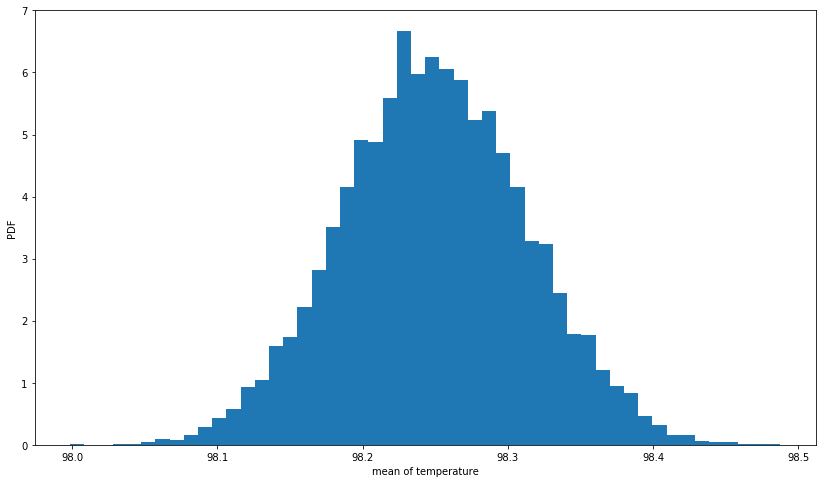

In [139]:
# Make a histogram of the results
_ = plt.hist(bs, bins=50, normed=True)
_ = plt.xlabel('mean of temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [140]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'temperature')

95% confidence interval = [ 98.12538462  98.37538462] temperature


the value 98.6 is not within the confidence inderval, this means that the null hypothesis can be regected.
The average population temperature is not 98.6

<b>Fequentist statistical testing</b>

A two sided test is appropriate to use since a set of temperatures will be tested against the population mean of 98.6, i.e. we can reject our hypothesis if teh sample mean if its statistically significantly higher or statistically significantly lower than 98.6.

The number of observatitions is >30 therefore a z test is appropriate 

In [141]:
z_stat, p_val_z = ztest(df.temperature, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -5.45482329236
p value = 4.9021570141e-08


The p-value is less than 0.05 and therefore we can reject the null hypothesis that the populations mean temperature is 98.6 F

Alternative test: T Test

In [142]:
t_stat, p_val_t = ttest_1samp(df.temperature, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.45482329236
p value = 2.41063204156e-07


The p-value is less than 0.05 and therefore we can reject the null hypothesis that the populations mean temperature is 98.6 F

### 4.Draw a small sample of size 10 from the data and repeat both frequentist tests.

We should use the t-test since our sample size is less than 30. But we are going to apply both tests

In [159]:
random.seed(1)
sample = np.random.choice(df.temperature, size=10, replace=False)

In [160]:
z_stat, p_val_z = ztest(sample, value = 98.6)
t_stat, p_val_t = ttest_1samp(sample, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

print('z-statistic:',z_stat)
print('p value =',p_val_z)



t-statistic: -1.77261567868
p value = 0.110051478111
z-statistic: -1.77261567868
p value = 0.0762924119201


We notice that the p value is quite different between the two tests.

### 5.At what temperature should we consider someone's temperature to be "abnormal"?

We will use both the boostrap approach, as well as the frequentist approach.

<b>Frequentist</b>

at 95% confidence level

In [172]:
CI_low, CI_high = ss.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())
print('Mean: ' + str(df.temperature.mean()))
print('Confidence Level: '+ str([CI_low, CI_high]))

Mean: 98.24923076923078
Confidence Level: [96.812218185403111, 99.686243353058444]


<b> Bootstrap </b>

In [177]:
bs = bootstrap(df.temperature, np.mean, size=10000)
conf_int = np.percentile(bs, [2.5, 97.5])
print('Confidence Level: '+ str(conf_int))

Confidence Level: [ 98.12230769  98.37538462]


### 6.Is there a significant difference between males and females in normal temperature?

In [125]:
np.mean(df.temperature[df.gender == 'M'])

98.1046153846154

In [128]:
np.mean(df.temperature[df.gender == 'F'])

98.39384615384613

In [180]:
print('Males sample size: ', len(df.temperature[df.gender == 'M']), '\nMale mean: ', np.mean(df.temperature[df.gender == 'M']))
print('Females sample size: ', len(df.temperature[df.gender == 'F']), '\nFemale mean:' , 
      np.mean(df.temperature[df.gender == 'F']))
t_test = ttest_ind(df.temperature[df.gender == 'M'],df.temperature[df.gender == 'F'])

print("As we have found a p-value of %  F < 0.025 (two-tailed hypothesis), we can reject the null hypothesis\n\
the Females and Males Temperature means are statisticaly significant different" % t_test[1])

Males sample size:  65 
Male mean:  98.1046153846154
Females sample size:  65 
Female mean: 98.39384615384613
As we have found a p-value of  0.023932 < 0.025 (two-tailed hypothesis), we can reject the null hypothesis
the Females and Males Temperature means are statisticaly significant different


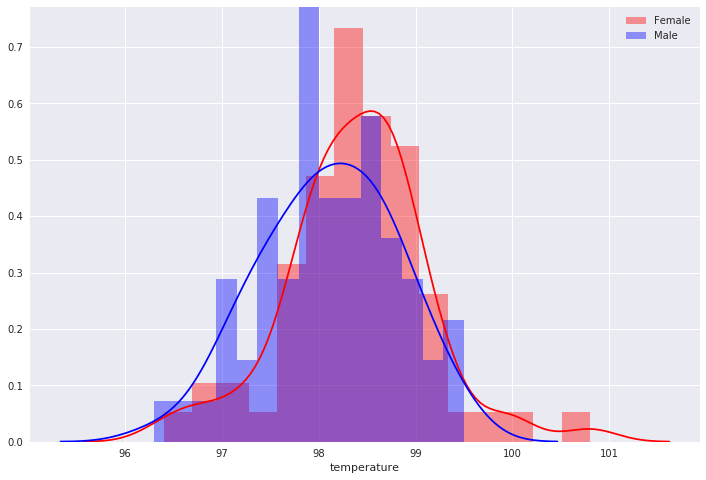

In [208]:
sns.distplot(df.temperature[df.gender == 'F'], label='Female', color='red', bins=15)
sns.distplot(df.temperature[df.gender == 'M'], label='Male', color='blue', bins=15)
plt.legend();

### Conclusion:

The sampled temperature is significantly lower than 98.6 F. 
If we only select female population the avg temperature is 98.6 F though. 
The sample mean is different for Females and Males, for Females its higher.  